# Programming for Data Analysis Project
## Eimear Butler, November 2018, Semester 2

### Problem statement

For this project you must create a data set by simulating a real-world phenomenon of your choosing. 

You may pick any phenomenon you wish. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python.

We suggest you use the numpy. random package for this purpose.

Specifically, in this project you should:

• Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

• Investigate the types of variables involved, their likely distributions, and their relationships with each other.

• Synthesise/simulate a data set as closely matching their properties as possible.

• Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

## Section 1

<div style="float: right">
<img style="float: right;" src="https://i.cbc.ca/1.4438426.1512698037!/cpImage/httpImage/image.jpg_gen/derivatives/16x9_780/cda-business-5-things-20170813.jpg" width="400" height="300">
</div>
**Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.**

For this project, I have chosen to simulate data regarding the sale of property in Dublin broadly based on asking prices currently advertised on Daft.ie<sup>2</sup>. The information from Daft.ie will be used as a guideline only and all data points will be simulated according to the relationships between the variables. 

**Investigate the types of variables involved, their likely distributions, and their relationships with each other.**

**Synthesise/simulate a data set as closely matching their properties as possible.**

The variables I am choosing to use are as follows: 

*NOTE: the overall dataframe is below and assinged the title "df_final"*

**Distance to City**

The rendom numbers generated for this variable will need to be a float and I am determining the range will be between 1 and 10km. 

From my previous assessment in this module<sup>1</sup>, the most suitable numpy random number generator function would appear to be: 

`(b - a) * np.random.random_sample((y, x)) + a`

Let's test it out...

In [7]:
import numpy as np #import numpy functionality
import pandas as pd #import pandas functionality

a = 0.2 #Lowest value in target range
b = 10 #Highest value in target range
x = 100 #Array Size on the x axis 
# y axis is not needed as we only want a 1 dimentional Array to feed into panda dataframe

distance = np.around((b - a) * np.random.random_sample((x)) + a, decimals = 2)  #source: https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html
#Requests an array of random numbers from 0.2 (but not including 0.2 itself) to 10 and round to two decimal places

pd.Series(distance) #source "Pandas and iris dataset notebook" Ian McLoughlin Semester 2 Lectures

0     3.17
1     1.95
2     2.60
3     9.42
4     3.04
5     1.58
6     7.27
7     5.73
8     4.06
9     8.26
10    5.75
11    8.72
12    2.08
13    2.84
14    2.98
15    8.71
16    5.47
17    2.20
18    5.42
19    7.98
20    6.99
21    3.00
22    2.83
23    1.61
24    3.58
25    9.50
26    1.99
27    8.73
28    9.95
29    6.96
      ... 
70    1.05
71    7.30
72    1.69
73    2.89
74    6.52
75    5.49
76    4.41
77    8.37
78    4.05
79    6.42
80    4.64
81    2.22
82    6.72
83    2.93
84    6.22
85    4.01
86    8.76
87    4.21
88    2.97
89    3.10
90    6.48
91    3.02
92    0.58
93    2.07
94    6.65
95    7.41
96    3.70
97    0.77
98    0.67
99    0.28
Length: 100, dtype: float64

We now have a list of distances we can use and the first column in our dataframe. 

**Property Type**

Next, I want to assign each of the 100 data points one of the following property types:

- Detached
- Semi-detached
- Terrace
- Apartment

I can see from looking at Daft.ie, in general there are more apartments and terrace houses for sale in the centre of the city than in the suburbs so I intent to have a higher probability for the assignment of those to distances within 2.5 km of the city centre. 

Below I manipulate `np.random.choice(a, b, p=[])` and an if/elif statement to generate the next array of data.

In [8]:
# First I establish the property types I want to assign
property_type = ['Detached', 'Semi-detached', 'Terrace', 'Apartment']

#At this stage, I do have the option to just generate equally random property types and associate them with a distance in a panda's dataframe using the formula below...
random_property_type = np.random.choice(property_type, 100) #source: https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html
f = pd.DataFrame({'Distance': distance, 'Property Type': random_property_type}) #source "Pandas and iris dataset notebook" Ian McLoughlin Semester 2 Lectures

#I can also print out the number of times each property type is used and can see that they are rasonably evenly distributed between the 4 options or skew in different directions each time it is run
len1 = len(f[f['Property Type'].str.contains('Detached')]) #source "Pandas and iris dataset notebook" Ian McLoughlin Semester 2 Lectures
len2 = len(f[f['Property Type'].str.contains('Semi-detached')])
len3 = len(f[f['Property Type'].str.contains('Terrace')])
len4 = len(f[f['Property Type'].str.contains('Apartment')])

print(len1, len2, len3, len4)

21 27 22 30


In [9]:
#However, as I said above, we know there are likely to be more apartments/terrace houses within 2.5km of the city centre and less outside of that so I want to reflect that in my data
#I instead split the distance figures into those within 2.5km (True) and outside of 2.5km (False)
w = distance <= 2.5

#taking my list, I now instruct numpy to not just generate a random property type for each of the 10 data points but to create preferences based on the probability weighting (p=[])

z = []    #I create an empyt set to populate with the output from the below function

for i in w:              #for all the w list which now consists of just True/False statements
    
    if i == True:        #where i is True i.e. the property is closer to the city..... 
        dist_weighted = np.random.choice(property_type, p=[0.05, 0.1, 0.25, 0.6]) #create a random number order of list where probabilty is increases for Apartments [original list: 'Detached', 'Semi-detached', 'Terrace', 'Apartment']
        z.append(dist_weighted) #add the outputed random number to the list 'z'
        
    elif i == False:     #where i is False i.e. the property is further from the city..... 
        dist_weighted = np.random.choice(property_type, p=[0.25, 0.55, 0.1, 0.1]) #here, semi detached houses will be more popular (approx. 55%).
        z.append(dist_weighted)   #add the outputed random number to the list 'z'
        
#we now have a list of property types called "dist_weighted" that is still random but will reflect a more "real life" data set due to my 
#instruction to numpy to alter the probability of one result above another based on the information in the first column (i.e. the distance)

#print(z)  #remove first hashtag in this row to show the output list  
len(z)

100

In [10]:
#let's add the property types into the data frame 
df = pd.DataFrame({'Distance': distance, 'Property Type': z, 'Within 2.5km of Centre': w})

#I can now isolate the True rows to see if there is a preference for apartments/terrace houses
df_true = df.loc[df['Within 2.5km of Centre'] == True] #source https://erikrood.com/Python_References/rows_cols_python.html
df_true # looks like there is and it worked!

,Distance,Property Type,Within 2.5km of Centre
1,1.95,Terrace,True
5,1.58,Apartment,True
12,2.08,Terrace,True
17,2.20,Apartment,True
23,1.61,Apartment,True
26,1.99,Apartment,True
30,1.77,Apartment,True
32,1.43,Apartment,True
39,0.41,Apartment,True
41,0.92,Semi-detached,True


In [11]:
#I can also print out the number of times each property type is used to see if there is a bias for apartments/terrace houses in the city centre
len_df_true = len(df_true)
len_df_false = (len(df)-len_df_true)
len5 = len(df_true[df_true['Property Type'].str.contains('Detached')]) #source https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html
len6 = len(df_true[df_true['Property Type'].str.contains('Semi-detached')])
len7 = len(df_true[df_true['Property Type'].str.contains('Terrace')])
len8 = len(df_true[df_true['Property Type'].str.contains('Apartment')])

print("%d of the 100 data points are within 2.5km of the city centre. Total number of Apartments are %d and Terrace Houses are %d overall for properties within 2.5km showing a clear preference for them within this criteria." % (len_df_true, len8, len7),)

27 of the 100 data points are within 2.5km of the city centre. Total number of Apartments are 16 and Terrace Houses are 6 overall for properties within 2.5km showing a clear preference for them within this criteria.


**Condition**

Next we want to assign each of the 100 data points a rating from 1 to 10 of how good condition the property is in. In theory any of the poperties could be in very good or very bad condition and so we will use the formula `np.random.randint()` to produce random integers.

In [12]:
condition = np.random.randint(1, 11, size = 100) #generates 100 integers between 1 and 10. Source https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html

#let's take a look at the overall dataframe created so far before moving on

df = pd.DataFrame({'Distance': distance,'Property Type': z, 'Condition': condition})
df

,Distance,Property Type,Condition
0,3.17,Detached,2
1,1.95,Terrace,3
2,2.60,Apartment,6
3,9.42,Semi-detached,10
4,3.04,Semi-detached,5
5,1.58,Apartment,2
6,7.27,Semi-detached,8
7,5.73,Apartment,5
8,4.06,Semi-detached,3
9,8.26,Semi-detached,3


**Number of Bedrooms**

Next we want to determine how many bedrooms each property has. Again, in theory an apartment could have 4 bedrooms and a house 1 but experience tells me most properties will have either 2 or 3 bedrooms. `np.random.choice()` is therefore useful again to help us create weighted results.  

In [13]:
# First I establish the numner of bedrooms I want to include
bed = range(1,5)

#Now I can generate random bedroom numbers with a preference for 2 and 3 bedrooms 
bedrooms = np.random.choice(bed, 100, p=[0.1, 0.4, 0.4, 0.1]) #approx 8/10 properties will be assigned 2 or 3 bedrooms. Source https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html
bedrooms       

array([2, 2, 2, 2, 1, 3, 2, 4, 2, 3, 2, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 2,
       2, 2, 2, 2, 3, 1, 2, 2, 1, 1, 1, 3, 3, 3, 3, 2, 1, 2, 3, 2, 2, 2,
       4, 1, 3, 3, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 3, 2, 2, 4, 3, 2, 1,
       3, 3, 4, 2, 2, 3, 3, 3, 4, 1, 3, 3, 2, 3, 3, 4, 2, 4, 4, 2, 2, 2,
       4, 1, 4, 3, 3, 2, 2, 2, 3, 2, 3, 3])

In [14]:
#Again let's add them into the overall data frame and take a look...

df = pd.DataFrame({'Distance': distance,'Property Type': z, 'Number of Bedrooms': bedrooms, 'Condition': condition})
df    

,Distance,Property Type,Number of Bedrooms,Condition
0,3.17,Detached,2,2
1,1.95,Terrace,2,3
2,2.60,Apartment,2,6
3,9.42,Semi-detached,2,10
4,3.04,Semi-detached,1,5
5,1.58,Apartment,3,2
6,7.27,Semi-detached,2,8
7,5.73,Apartment,4,5
8,4.06,Semi-detached,2,3
9,8.26,Semi-detached,3,3


**Square Metre Price**

Finally, we want to see if we can generate a random price per square meter for each property based on the attributes we have already established. Again common sense and a quick look at Daft.ie will tell you that the following will have an effect on the overall square meter price: 
- being closer to the city = higher price
- more detatched the property = higher price
- more bedrooms = higher price
- better condition the property is in = higher price

So let's generate random numbers that account for these atributes. 

In [15]:
#First I will establish a range of prices that Numpy can use as upper and lower limits to assign a price to each atribute
#The intention is to take the average of each assigned atribute price to get an overall random generated "Square Meter Price" for each of the 100 properties 

range_1a, range_1b = 5500, 6500 #create 4 ranges of prices that will be assigned based on atributes in the next cells 
range_2a, range_2b = 4000, 5500 #prices decrease through out the range
range_3a, range_3b = 3000, 4000
range_4a, range_4b = 2500, 3000

In [16]:
d = [] #create an empty list for the distance pricing
    
for i in distance:     #using a python if statements, determines which distance values should be within which range. 
    if i < 2:          #cut off points are 2, 5, 7 and 10
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        d.append(price_range) #add the resulting random number to the d list until the whole distance column has been assigned a number
    elif i < 5:        #repeat
        price_range = np.random.randint(range_2a, range_2b)
        d.append(price_range)
    elif i < 7:
        price_range = np.random.randint(range_3a, range_3b)
        d.append(price_range)
    else:
        price_range = np.random.randint(range_4a, range_4b)
        d.append(price_range)
        
print(len(d)) #confirm we have generated 100 new random numbers
#print(d)  #remove hashtag here to show the newly generated list. 

100


In [17]:
p = [] #create an empty list for the property type pricing

for i in z:                    #using a python if statements, determines which property type should be within which range. 
    if i == 'Detached':        #each of the 4 types are assigned a range
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        p.append(price_range) #add the resulting random number to the p list until the whole property column has been assigned a number
    if i == 'Semi-detached':         #repeat
        price_range = np.random.randint(range_2a, range_2b) 
        p.append(price_range)
    if i == 'Terrace':
        price_range = np.random.randint(range_3a, range_3b) 
        p.append(price_range)
    if i == 'Apartment':
        price_range = np.random.randint(range_4a, range_4b) 
        p.append(price_range)

print(len(p))  #confirm we have generated 100 new random numbers
#print(p)  #remove hashtag here to show the newly generated list. 

100


In [18]:
b = [] #create an empty list for the bedroom pricing

for i in bedrooms:            #using a python if statements, determines which bedroom quantity should be within which range.
    if i == 4:                #each of the 4 types are assigned a range
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        b.append(price_range) #add the resulting random number to the b list until the whole bedroom column has been assigned a number
    if i == 3:                #repeat
        price_range = np.random.randint(range_2a, range_2b) 
        b.append(price_range)
    if i == 2:
        price_range = np.random.randint(range_3a, range_3b) 
        b.append(price_range)
    if i == 1:
        price_range = np.random.randint(range_4a, range_4b) 
        b.append(price_range)

print(len(b)) #confirm we have generated 100 new random numbers
#print(b)  #remove hashtag here to show the newly generated list. 

100


In [19]:
c = [] #create an empty list for the condition pricing

for i in condition:               #using a python if statements, determines which condition value should be within which range.
    if i in range (7, 11):        #cut off points are 7, 5, 3 and 0
        price_range = np.random.randint(range_1a, range_1b) #the numbers generated are still random yet based within the appropriate range
        c.append(price_range)     #add the resulting random number to the c list until the whole condition column has been assigned a number
    if i in range (5, 7):         #repeat
        price_range = np.random.randint(range_2a, range_2b) 
        c.append(price_range)
    if i in range (3, 5):
        price_range = np.random.randint(range_3a, range_3b) 
        c.append(price_range)
    if i in range (0, 3):
        price_range = np.random.randint(range_4a, range_4b) 
        c.append(price_range)

print(len(c)) #confirm we have generated 100 new random numbers
#print(c)  #remove hashtag here to show the newly generated list. 

100


In [20]:
#Reviewing all the pricing is easiest to do in a pandas dataframe  
df_pricing = pd.DataFrame({'Distance Pricing': d,'Property Type Pricing': p, 'Bedroom Pricing': b, 'Condition Pricing': c})

#here we can also get the mean of each row of prices to generate an overall average price which we will also use as the Square Meter Price
square_m = df_pricing.mean(axis=1) #source: https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.mean.html
df_pricing = pd.DataFrame({'Distance Pricing': d,'Property Type Pricing': p, 'Bedroom Pricing': b, 'Condition Pricing': c, 'Mean Price': square_m})
df_pricing

,Distance Pricing,Property Type Pricing,Bedroom Pricing,Condition Pricing,Mean Price
0,4097,6059,3869,2650,4168.75
1,6346,3059,3787,3167,4089.75
2,4141,2614,3529,5416,3925.00
3,2886,4436,3367,6102,4197.75
4,4726,5059,2745,4436,4241.50
5,5598,2937,4633,2618,3946.50
6,2661,5163,3261,6398,4370.75
7,3239,2775,5846,4070,3982.50
8,5148,4690,3259,3144,4060.25
9,2923,4201,5003,3607,3933.50


In [21]:
#adding the Square Meter Price to the overall generated dataframe, results in the following: 
df_final = pd.DataFrame({'Distance': distance,'Property Type': z, 'Number of Bedrooms': bedrooms, 'Condition': condition, 'Square Metre Price': square_m})
df_final

,Distance,Property Type,Number of Bedrooms,Condition,Square Metre Price
0,3.17,Detached,2,2,4168.75
1,1.95,Terrace,2,3,4089.75
2,2.60,Apartment,2,6,3925.00
3,9.42,Semi-detached,2,10,4197.75
4,3.04,Semi-detached,1,5,4241.50
5,1.58,Apartment,3,2,3946.50
6,7.27,Semi-detached,2,8,4370.75
7,5.73,Apartment,4,5,3982.50
8,4.06,Semi-detached,2,3,4060.25
9,8.26,Semi-detached,3,3,3933.50


## Plotting Graphs - Visual Analysis 

In order to truely appreciate the data created, I now wish to use matplotlib and seaborn to show the data in relevant plots.  

In [22]:
import matplotlib.pyplot as plt  #import matplotlib functionality

(m,c) = np.polyfit(distance,square_m,1) #use ployfit function to determine least squares polynomial line fit, where 1 is the Degree of the fitting the polynomial
#Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 

#where the resuting m and c are values in the equation of a straight line (y=mx+c)

print(m,c) 

-86.78643505132892 4704.951735046599


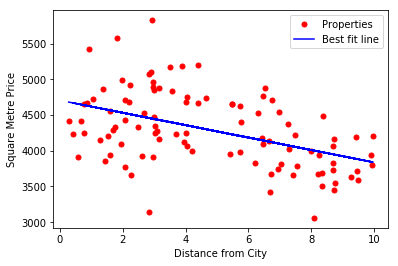

In [23]:
plt.plot(distance, square_m, 'k.', label='Properties', markersize=10, color='Red') # Plot distance and Square Metre Price to see how they relate 
plt.plot(distance, m * distance + c, 'b-', label='Best fit line') #add best fit line to show a general trend within the data

plt.xlabel('Distance from City') #set name for x axis
plt.ylabel('Square Metre Price') #set name for y axis

plt.legend() # add a legend
plt.show() #show the plot inline

# Reference: Ian McLoughlin "Simple Linear Regression with NumPy" Jupyter Notebook, Semester 2 GMIT 

From the above, we can see that there is a trend towards a lower price per square metre as the properties move further away from the city. This is not even accounting for their size or condition. This further proves my earlier manipulation of the data has resulted in datapoints that are somewhat reflective of reality. 

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


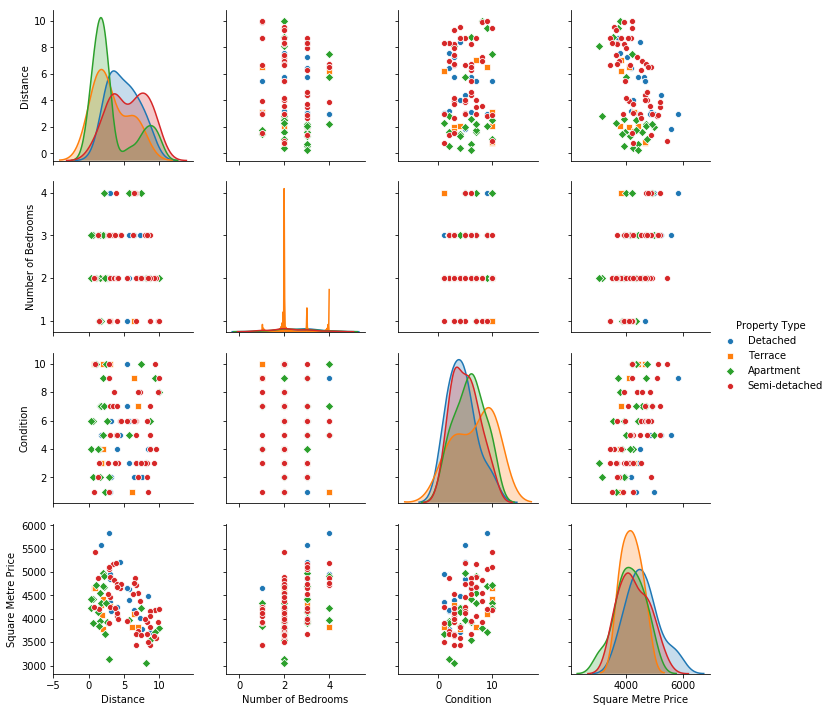

In [24]:
#In theory, if you could import the live data from Daft.ie, you could very easily create instant plots like the ones below to see which 
#properties meet your initial criteria, e.g. are in reasonably good condition and near the city 

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df_final, hue='Property Type', markers=["o", "s", "D", "o"])

Ideally I would have liked to show bedroom number as different sized data points with condition as a varying scale of one colour (light to dark) but unfortunately I couldnt find a plot that could quite accomodate my vision. 

Instead, I adapted my data slighly to produce the single best overview of all the data I generated above. Condition instead of being on a scale of 1-10 is modified into 2 groups over 7 and under 7.


In [25]:
c2 = condition >= 7 #c2 becomes a new array splitting the condition variable into two groups 

#add this new column of data into our final dataframe
df_final2 = pd.DataFrame({'Distance': distance,'Property Type': z, 'Number of Bedrooms': bedrooms, 'Condition':condition, 'Condition2':c2, 'Square Metre Price': square_m})

#now I want to convert the True/False Booleon to strings so it represents the new data best
bool_cols = df_final2.columns[df_final2.dtypes == 'bool']
df_final2[bool_cols] = df_final2[bool_cols].replace({True: 'Over 7', False: 'Under 7'})
#df_final2   #remove hashtag here to show the newly generated list. 

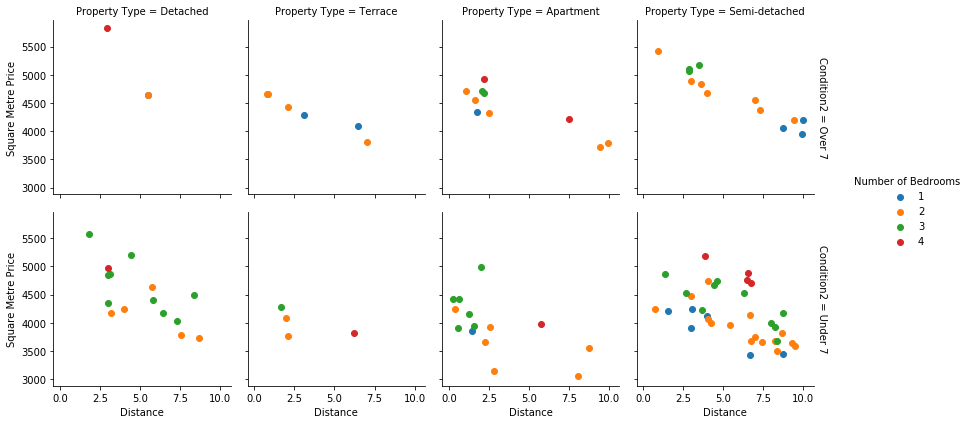

In [26]:
#I now can represent all critical variables on a single series of plots where the upper row of plots will show data for properties with a condition score of 7 or over and the secnd row of plots for those below 7.

#create grid of plots where col = the information spread across columns,row = the same for each row, hue = differentiation through data point colour and other components add to the formatting of the plots
g = sns.FacetGrid(df_final2, col="Property Type", row="Condition2", row_order=['Over 7', 'Under 7'], hue="Number of Bedrooms", legend_out=True, margin_titles=True) #source: https://www.tutorialspoint.com/seaborn/seaborn_facet_grid.html

#create scatterplot where from the dataframe, Distance and Square Metre Price are represented on each x and y axis
g.map(plt.scatter, "Distance", "Square Metre Price")  
g.add_legend() #include legena


Reviewing this data, I can now see how each house type compares with regard to their size, condition, distance to the city and price across each category of house. Depending on the property I am looking for, for example a 2 bedroom detached house around 5km from the city needing some work, I can see if there are opportunities available in the third plot on in the second row. 

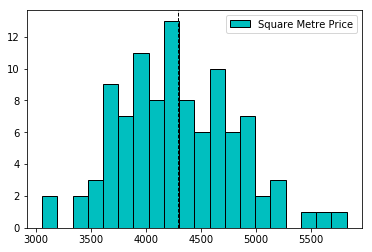

In [39]:
import matplotlib.pyplot as plt
plt.hist(square_m, bins=20, label='Square Metre Price', color='c', edgecolor='k') #plot a histogram for the square metre price to visualise the trend in the market and identify and outliers
plt.axvline(square_m.mean(), color='k', linestyle='dashed', linewidth=1) #source: https://stackoverflow.com/questions/16180946/drawing-average-line-in-histogram-matplotlib
plt.legend() # add a legend
plt.show() #show the plot inline

The histogram allows me to view a single variable and allows me to identify any significant outliers worth further investigation. For example, a low square metre price may be justifiable for a smaller property in bad condition further fromt he city but this allows me to see that. It also allows me to see the mean of the dataset identified by the vertical dashed black line. 

### Next Steps of Investigation

With more information on localities, actual sales price ve asking price and the number of days for the property to sell, I could use Seaborn to create a heatmap showing areas that are in demand. (https://seaborn.pydata.org/generated/seaborn.heatmap.html) 

## Machine Learning

In [203]:
If this 

SyntaxError: invalid syntax (<ipython-input-203-118166fa7a9a>, line 1)

## Conclusion

In conclusion, using a combination of the `numpy.random` function and if/elif statements, I was able to generate data that is reasonably reflective of realy life and based on the general assumptions anyone can make when reviewing askign prices on Daft.ie.  

## References

1. https://github.com/eimearbutler7/Programming4DA/blob/master/P4DA_Assignment.ipynb
2. Daft.ie examples
  - https://www.daft.ie/dublin/houses-for-sale/beaumont/5-coolatree-close-beaumont-dublin-1931390/
  - https://www.daft.ie/dublin/apartments-for-sale/ifsc/1-semple-house-custom-house-square-ifsc-dublin-1975329/
  - https://www.daft.ie/dublin/houses-for-sale/whitehall/275-collins-avenue-whitehall-dublin-1960290/